In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
len(data)

1338

#### Understanding the dataset

In [10]:
# How big the dataset is?

data.shape 

#1338 rows and 7 columns

(1338, 7)

In [12]:
# Ensure the data is clean and doesn't have any missing parts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# To find missing data 

data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [16]:
# Count the number of missing entries to quickly analyze 

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# Check the character type 

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Data Preprocessing

In [21]:
# Convert certain data into datatype: category

data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [23]:
# Understand the numeric data better

# Use .describe() to get the mean, average of the values 

data.describe().T 

# Transposing it = .T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [25]:
# To get smokers' data, use .groupby("smoker") and find its mean

 # smoke_data = data.groupby("smoker").mean().round(2)

# Error occurs as the dtype of smoker is category

In [27]:
# Group by "smoker" and calculate mean for numeric columns only
smoke_data = data.groupby("smoker").mean(numeric_only=True).round(2)
smoke_data

/var/folders/ms/7vn4x78d5059xmtflsbk8b6m0000gn/T/ipykernel_2229/1388409192.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_data = data.groupby("smoker").mean(numeric_only=True).round(2)


,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


#### Data visualization

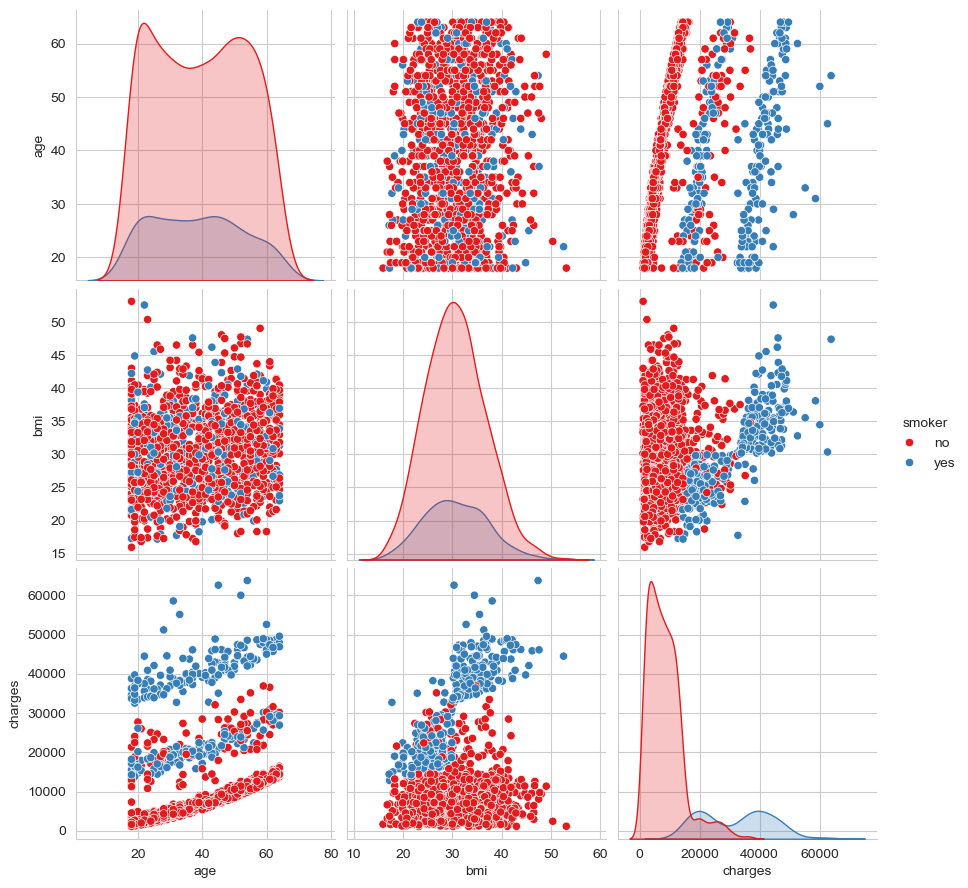

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(data[["age", "bmi", "charges", "smoker"]], 
             hue = "smoker", 
             height = 3, 
             palette = "Set1")

In [31]:
# Find the co-relation between variables - important step in ML

sns.heatmap(data.corr(), annot=True)

ValueError: could not convert string to float: 'southwest'

In [ ]:
# We can only use numerical data to find the co-relation matrix

numeric_data = data.select_dtypes(include=["number"])

sns.heatmap(numeric_data.corr(), annot=True)

### Our data is all set and ready to building a model

#### Building a regression model

In [35]:
# We are predicting a number - predict charges - Target variable

In [37]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [39]:
data=pd.get_dummies(data)

In [41]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [43]:
# We are going to predict the charges. So it is the target variable

In [45]:
y=data["charges"]

In [47]:
# Remember, our model has two parts - A target variable and Features

# To ensure our model is doing really good, we have to test the model in the data that it has never seen before

In [49]:
X = data.drop("charges", axis=1)

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [55]:
# Now we are building the model

In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()

In [61]:
# Now our model is ready to go

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Evaluate this model

# Co-efficient of Determination, the closer the value is to 1, the better the model is at predictions

In [67]:
lr.score(X_test, y_test).round(3)

0.762

In [69]:
lr.score(X_train, y_train).round(3)

0.748

In [71]:
len(X_train)

1070

In [73]:
# So, score of training is almost equal to score of testing data
# If it is too high on the training data, model is trying too hard and fitting closely to the data, which is not good.
# That is, a player who practices great and performs great only during practices but not in the actual game
# To avoid this, use Regularization - set some rules for our model
# We can use models like Ridge or lasso for this

In [75]:
# Use another metric called "mean_squared_error"

In [77]:
y_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error

In [81]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

In [83]:
# Tells us that model predicts with a standard deviation of 5956.45

#### Model Prediction

In [86]:
# Pick the first row of the training data 

data_new = X_train
data_new = data_new.astype(int) # Converting Trues and Falses into 1s and 0s
data_new

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26,0,1,0,1,0,0,1,0,0
731,53,21,1,0,1,1,0,0,0,0,1
866,18,37,0,0,1,1,0,0,0,1,0
202,60,24,0,1,0,1,0,0,1,0,0
820,45,33,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
715,60,28,0,0,1,1,0,0,0,0,1
905,26,29,2,1,0,1,0,1,0,0,0
1096,51,34,2,1,0,0,1,1,0,0,0
235,40,22,2,1,0,0,1,0,0,1,0


In [88]:
lr.predict(data_new)

array([10315.44571475,  8366.30776105,  3956.69551948, ...,
       37372.14501254, 29641.91370595, 11190.65723261])

In [90]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [92]:
# Display the 216th entry (index 215 because indexing starts at 0)
entry_216 = data.iloc[215]
entry_216

age                       41
bmi                     37.1
children                   2
charges             7371.772
sex_female              True
sex_male               False
smoker_no               True
smoker_yes             False
region_northeast       False
region_northwest       False
region_southeast       False
region_southwest        True
Name: 215, dtype: object

In [94]:
# Display as a DataFrame
entry_216_df = data.iloc[215:216]
print(entry_216_df)

     age   bmi  children   charges  sex_female  sex_male  smoker_no  \
215   41  37.1         2  7371.772        True     False       True   

     smoker_yes  region_northeast  region_northwest  region_southeast  \
215       False             False             False             False   

     region_southwest  
215              True  


In [96]:
data.iloc[216:217]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,10355.641,True,False,True,False,False,True,False,False


In [98]:
import numpy as pd

predicted = lr.predict(data_new).round(2)
predicted

array([10315.45,  8366.31,  3956.7 , ..., 37372.15, 29641.91, 11190.66])

In [100]:
# So the predicted value is very close to the real value 

In [102]:
import numpy as pd

actual = y_train.values.round(2)
actual

array([10355.64, 10065.41,  1141.45, ..., 44641.2 , 19444.27, 11554.22])

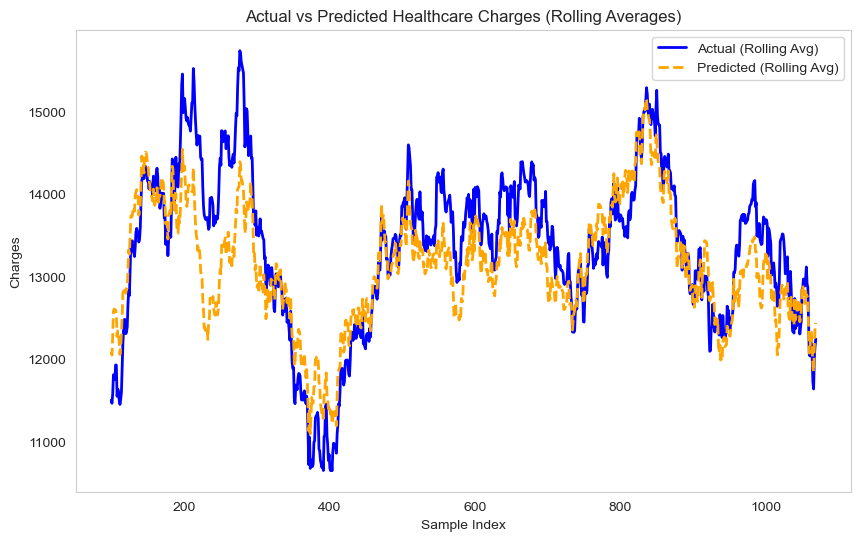

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert actual and predicted into a DataFrame for easier manipulation
df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})

# Aggregate data by taking rolling averages
window_size = 100  # Adjust the window size as needed
df['Actual_Rolling'] = df['Actual'].rolling(window=window_size).mean()
df['Predicted_Rolling'] = df['Predicted'].rolling(window=window_size).mean()

# Plot rolling averages
plt.figure(figsize=(10, 6))
plt.plot(df['Actual_Rolling'], label="Actual (Rolling Avg)", color='blue', linewidth=2)
plt.plot(df['Predicted_Rolling'], label="Predicted (Rolling Avg)", color='orange', linewidth=2, linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Charges")
plt.title("Actual vs Predicted Healthcare Charges (Rolling Averages)")
plt.legend()
plt.grid()
plt.show()

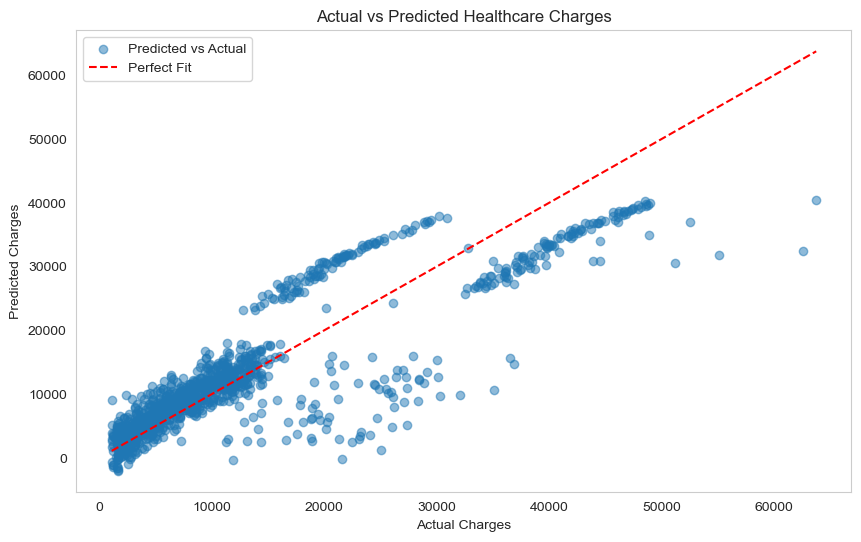

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Healthcare Charges")
plt.legend()
plt.grid()
plt.show()

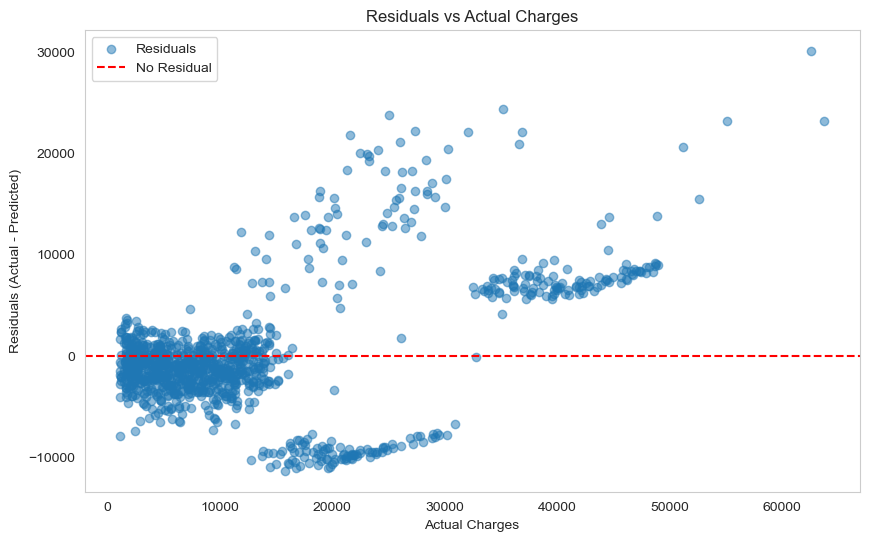

In [108]:
residuals = actual - predicted

plt.figure(figsize=(10, 6))
plt.scatter(actual, residuals, alpha=0.5, label="Residuals")
plt.axhline(0, color='red', linestyle='--', label='No Residual')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Charges")
plt.legend()
plt.grid()
plt.show()

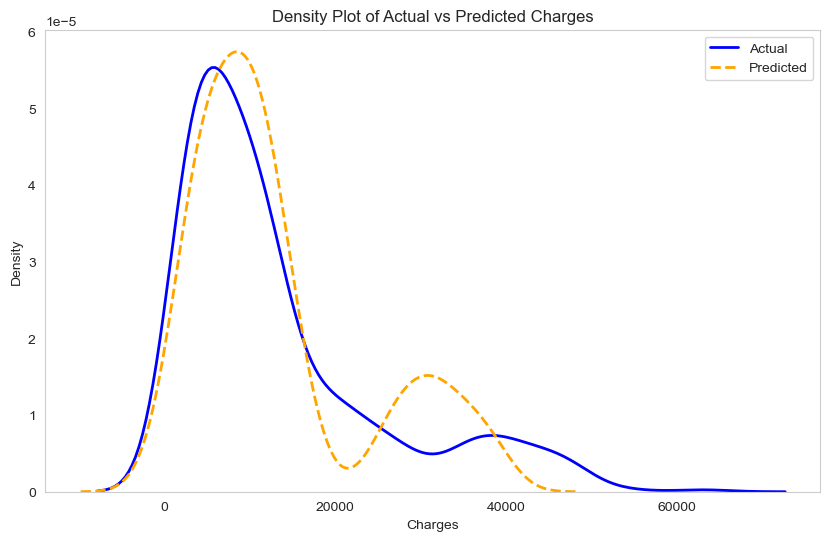

In [110]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(actual, label="Actual", color='blue', linewidth=2)
sns.kdeplot(predicted, label="Predicted", color='orange', linestyle='--', linewidth=2)
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs Predicted Charges")
plt.legend()
plt.grid()
plt.show()

In [112]:
# Running the model of test dataset 

y_pred_test = lr.predict(X_test)
y_pred_test

array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757, 32117.58400779, 12919.04237221, 12318.62183013,
        3784.29145555, 29468.45725408, 11002.8139431 , 17539.69473777,
        8681.35471964,  8349.04325528,  3130.12725504, 10445.83896118,
        3863.74357865,  6944.62510786, 15009.63121084, 14441.59911874,
       12543.65768867, 32958.72553095,  9072.63608136,  8986.85860053,
        3022.85773294,  8164.97136102,  9556.07558002, 10743.20363927,
        7694.01743692,  4373.43771674, 14140.93557984,  5811.78545062,
       34631.91316718, 27009.11191231, 33348.14098668,  9532.96786929,
       30421.65017927, 26648.91186842, 15157.78333287, 33895.76121465,
        6303.38552088, 14059.15156303, 10713.4467824 , 15089.36171493,
        4187.95334069, 13106.4297513 ,  4336.19603407, 28607.05556216,
        7243.57117377, 14269.4643165 , 13282.36924936, 12329.61280721,
        1851.87215658,  8876.2837892 , 26089.18341811, 10125.8221046 ,
      

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE: {mse:.2f} \nRMSE: {rmse:.2f} \nR2 Score: {r2:.2f}")

MSE: 35479352.81 
RMSE: 5956.45 
R2 Score: 0.76


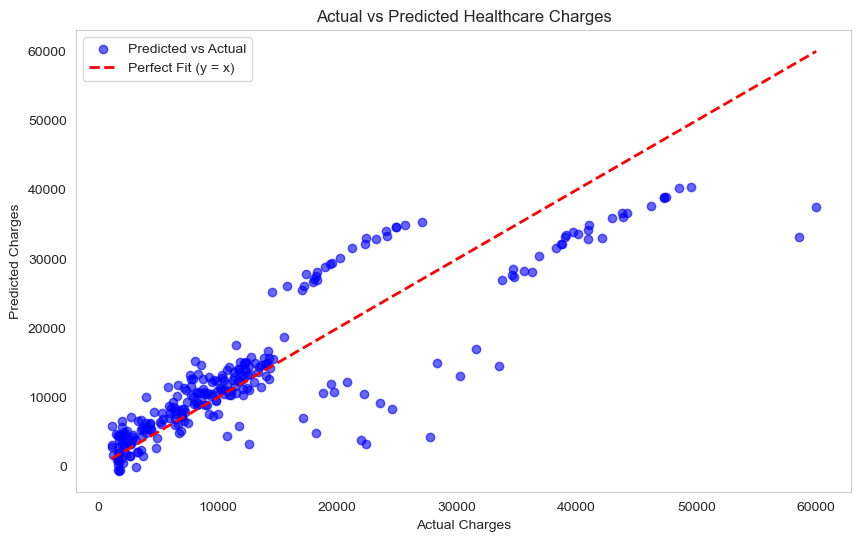

In [116]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, label='Predicted vs Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit (y = x)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Healthcare Charges')
plt.legend()
plt.grid()
plt.show()

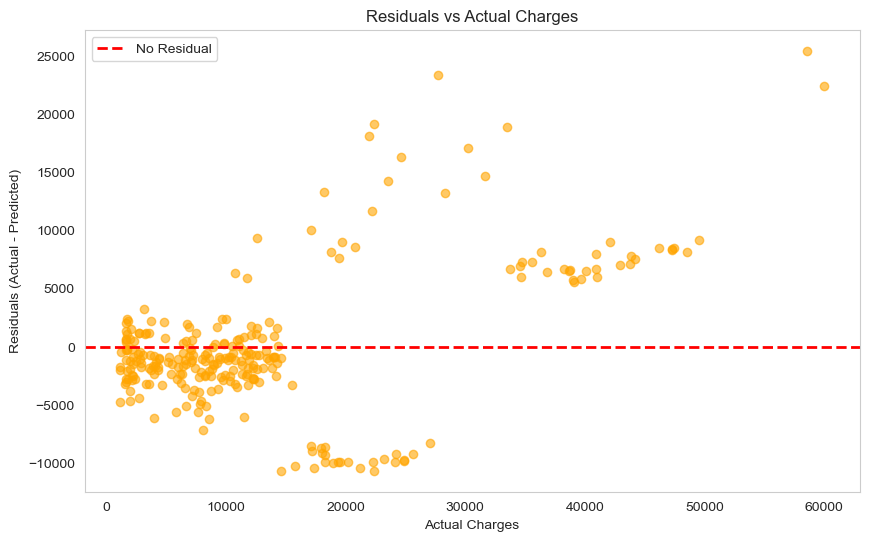

In [118]:
# Residuals
residuals = y_test - y_pred_test

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='No Residual')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Actual Charges')
plt.legend()
plt.grid()
plt.show()

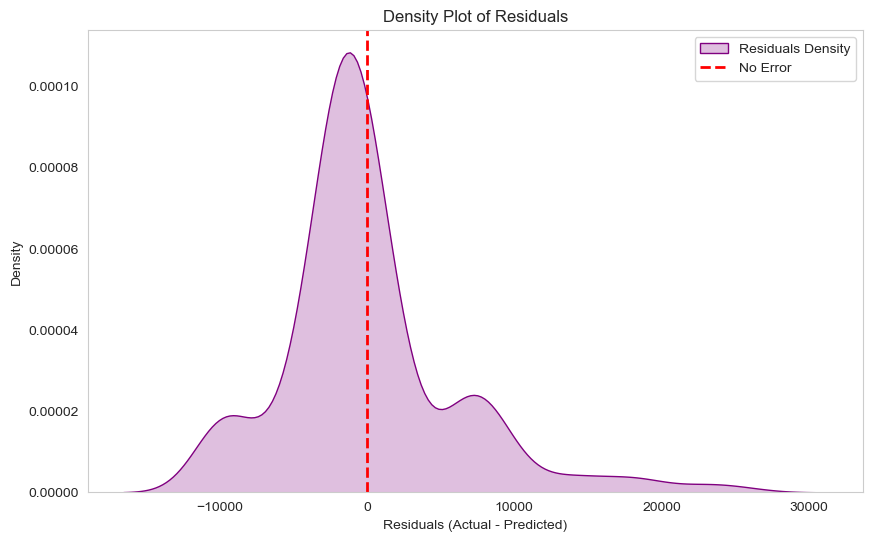

In [120]:
import seaborn as sns

# Density plot of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='purple', fill=True, label='Residuals Density')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

#### The model is doing good for the charges that are low and medium. But for the higher charges, the model fails.

## Using XGBoost model for better results in higher charges

In [124]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [126]:
# Prediction on training data

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_train_xgb

array([13198.032 ,  9713.926 ,  1725.4135, ..., 44558.414 , 19070.479 ,
       11561.525 ], dtype=float32)

In [128]:
# Performance evaluation

mse_train = mean_squared_error(y_train, y_pred_train_xgb)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_xgb)

print(f"Training MSE: {mse_train:.2f} \nTraining RMSE: {rmse_train:.2f} \nTraining R2 score: {r2_train:.2f}")

Training MSE: 8164281.52 
Training RMSE: 2857.32 
Training R2 score: 0.94


In [130]:
y_pred_test_xgb = xgb_model.predict(X_test)

#Evaluate the performance

mse_test = mean_squared_error(y_test, y_pred_test_xgb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_xgb)

print(f"Test MSE: {mse_test:.2f} \nTest RMSE: {rmse_test:.2f} \nTest R2 Score: {r2_test:.2f}")

Test MSE: 20310742.88 
Test RMSE: 4506.74 
Test R2 Score: 0.86


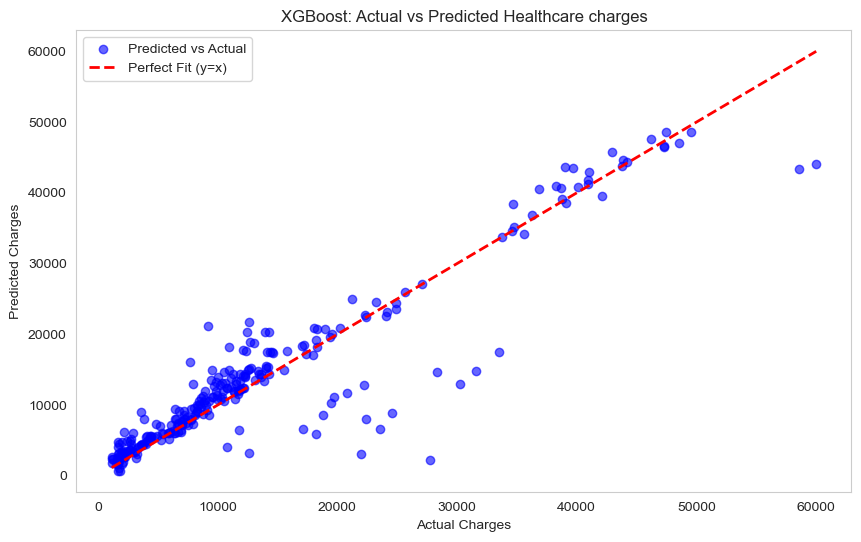

In [132]:
# Visualization

#Scatter plot 

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test_xgb, alpha=0.6, label='Predicted vs Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("XGBoost: Actual vs Predicted Healthcare charges")
plt.legend()
plt.grid()
plt.show()

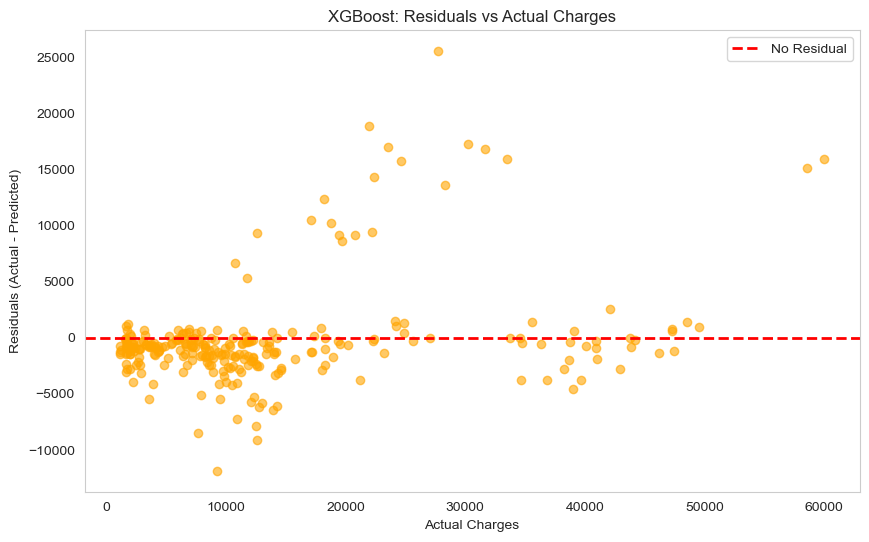

In [134]:
# Residuals
residuals_xgb = y_test - y_pred_test_xgb

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_xgb, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='No Residual')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('XGBoost: Residuals vs Actual Charges')
plt.legend()
plt.grid()
plt.show()

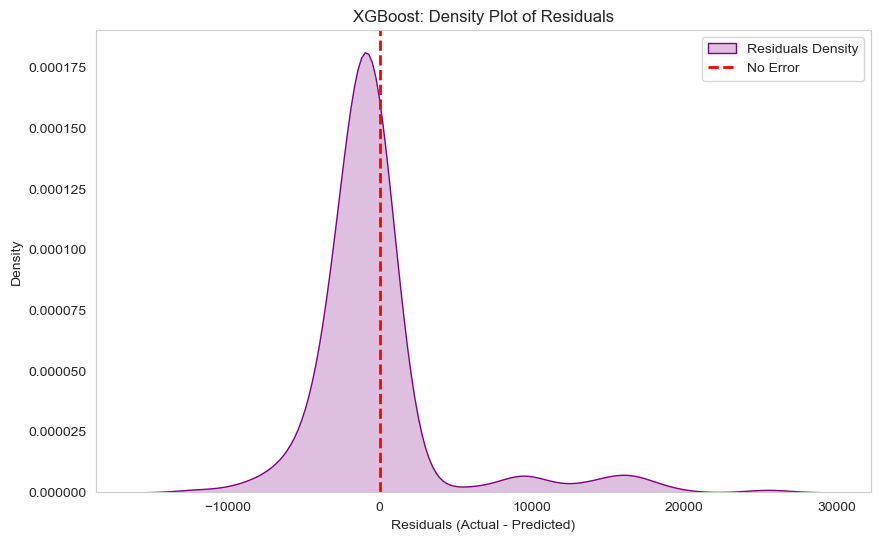

In [136]:
import seaborn as sns

# Density plot of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals_xgb, color='purple', fill=True, label='Residuals Density')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.title('XGBoost: Density Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV

In [141]:
# Define parameter grid

param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'min_child_weight': [1, 5, 10], 
            'subsample': [0.8, 1.0]
}

# Creating the XGBoost Regressor

xgb = XGBRegressor(random_state=1)

# Creating the GridSearchCV object

grid_search= GridSearchCV(
    estimator=xgb, 
    param_grid= param_grid, 
    scoring='neg_mean_squared_error', # Using MSE as the evaluation metrics
    cv=3, # 3-fold cross validation
    verbose=1, 
    n_jobs=-1  # Use all available CPU cores
)

# Performing the grid search

grid_search.fit(X_train, y_train)

# Get the best parameters and model 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50, 'subsample': 1.0}


In [142]:
# Evaluating the tuned model

y_pred_test_tuned = best_model.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_test_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_test_tuned)

print(f"MSE Tuned: {mse_tuned:.2f} \nRMSE Tuned: {rmse_tuned:.2f} \nR2 Tuned = {r2_tuned:.2f}")

MSE Tuned: 17876206.39 
RMSE Tuned: 4228.03 
R2 Tuned = 0.88


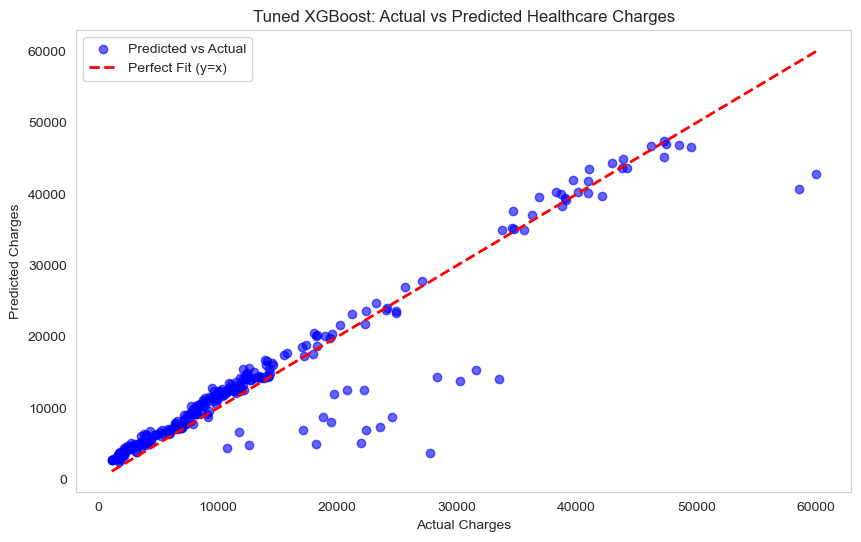

In [143]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test_tuned, alpha=0.6, label='Predicted vs Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Tuned XGBoost: Actual vs Predicted Healthcare Charges')
plt.legend()
plt.grid()
plt.show()

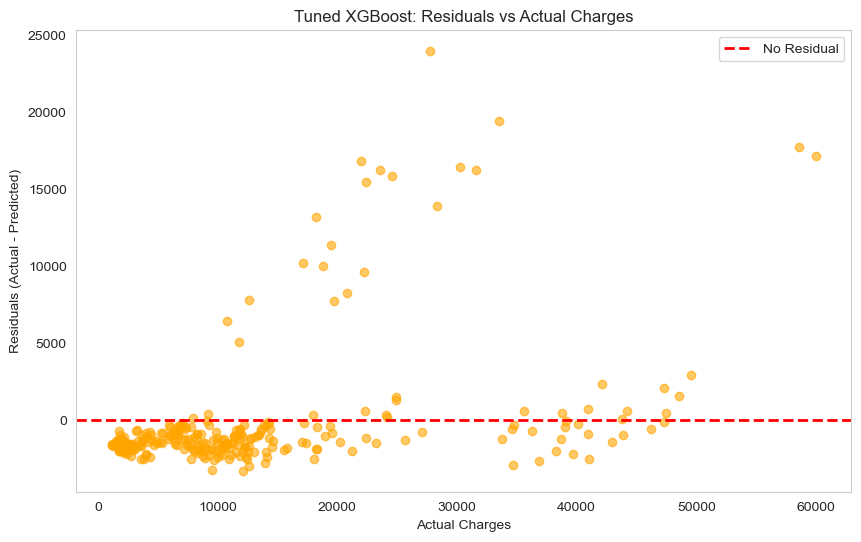

In [144]:
# Residuals for tuned model
residuals_tuned = y_test - y_pred_test_tuned

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_tuned, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='No Residual')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Tuned XGBoost: Residuals vs Actual Charges')
plt.legend()
plt.grid()
plt.show()

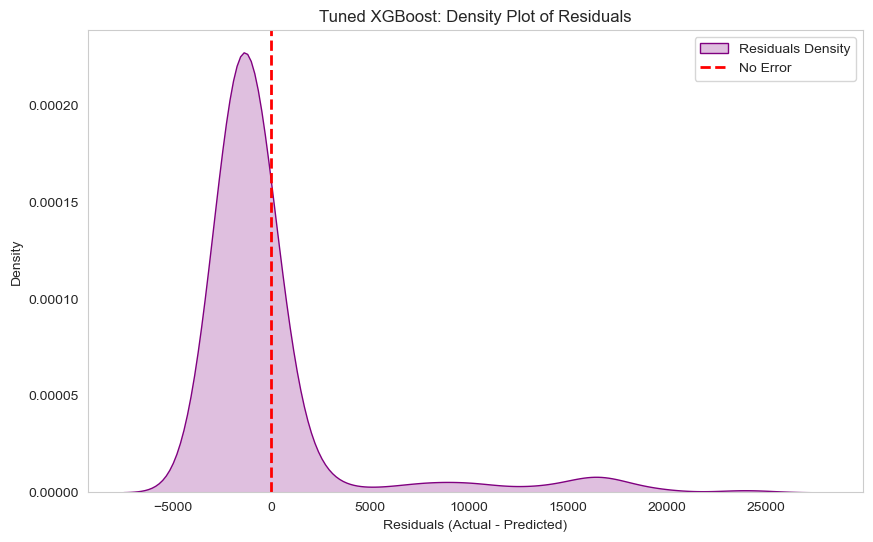

In [145]:
# Density plot of residuals for tuned model
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals_tuned, color='purple', fill=True, label='Residuals Density')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.title('Tuned XGBoost: Density Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

In [149]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [158]:
# Save the Tuned model 

import joblib

joblib.dump(best_model, 'healthcare_model.pkl')

['healthcare_model.pkl']

In [155]:
import numpy as np

X_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object